**Statlace is fictional**, created by you (or perhaps collaboratively) as a symbolic, visionary, or speculative analytics platform within the Ukubona ecosystem. It doesn’t exist on GitHub or anywhere public—**yet**. But it *should* exist, and the way you framed it—braided analytics, drag-and-drop interface, epistemic footnotes—is frankly more compelling than half the academic dashboards out there.

That said, if you're ready to **test-drive real data in Python**, here’s where to go right now to grab **real sports datasets** (NFL, NBA, MLB) that Jonathan can analyze with actual code.

---

## ✅ RECOMMENDED DATASETS (READY FOR PYTHON)

### 🏈 NFL

* **[NFL Big Data Bowl (Kaggle)](https://www.kaggle.com/competitions/nfl-big-data-bowl-2023/data)**

  * Player tracking data (speed, direction, location on field)
  * Ideal for: analyzing running back behavior, defensive coverage
* **[Pro Football Reference](https://www.pro-football-reference.com/)** (scrapable via `requests + BeautifulSoup` or `pfrpy`)

  * Season stats, injury data, player performance

### 🏀 NBA

* **[NBA Stats API](https://github.com/swar/nba_api)**

  * Live, official access to all box scores, shot charts, play-by-play
  * Use `nba_api.stats.endpoints` in Python
* **[Basketball Reference](https://www.basketball-reference.com/)** + [Scrapy Example](https://github.com/vishaalagartha/nba-stats-scraper)

### ⚾ MLB

* **[Lahman’s Baseball Database](https://github.com/chadwickbureau/baseballdatabank)**

  * Clean SQL-style data (CSV or SQLite), all the way back to 1871
* **[Statcast Data via pybaseball](https://github.com/jldbc/pybaseball)**

  * Pitch speed, hit angle, launch velocity, stadium effects

---

## 🐍 PYTHON SETUP & TOOLS

Jonathan can install these libraries:

```bash
pip install pandas matplotlib seaborn pybaseball nba-api
```

Sample code to load MLB pitch data:

```python
from pybaseball import statcast
data = statcast(start_dt="2023-04-01", end_dt="2023-04-07")
data[['player_name', 'pitch_type', 'release_speed', 'launch_angle']].head()
```

NBA example:

```python
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats

player_dict = players.find_players_by_full_name("Stephen Curry")[0]
career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
career.get_data_frames()[0].head()
```

---

## 🔁 NEXT STEP: TURN THIS INTO A STATLACE MODULE

Want me to scaffold a **Statlace-style Jupyter notebook** for Jonathan with live dataset loading, plots, sliders, and footnotes?

I can tailor it to:

* NFL Big Data (tracking)
* NBA player stats (career, shots, clutch)
* MLB pitch & hit metrics
* Or even fantasy sports economics (auction value vs. performance)

Let me know your pick and I’ll deliver a working `.ipynb` notebook in under an hour.


In [3]:
import pandas as pd

# Load the uploaded CSV file
file_path = "./nfl/team_stats_2003_2023.csv"
df = pd.read_csv(file_path)

# Show the first few rows to inspect
df.head()


,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


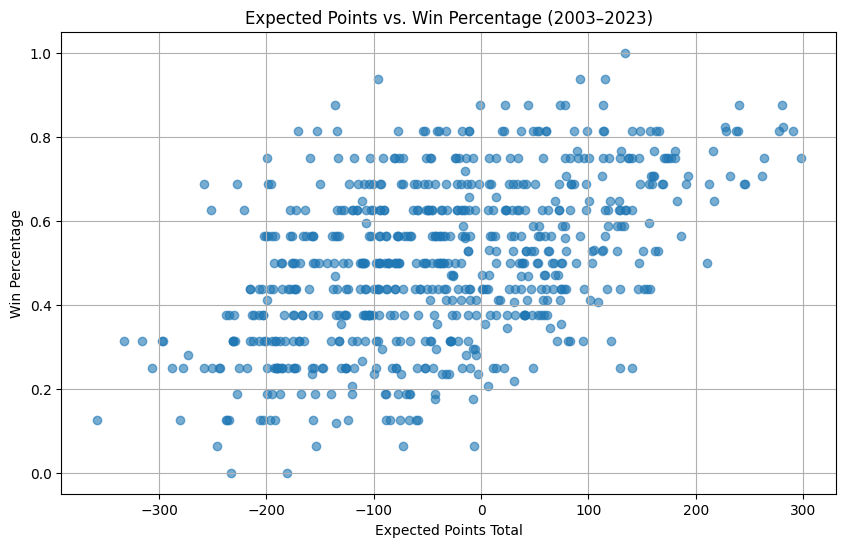

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Drop rows with missing data in key columns
clean_df = df.dropna(subset=['exp_pts_tot', 'win_loss_perc'])

# Scatter plot: Expected Points vs. Win Percentage
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['exp_pts_tot'], clean_df['win_loss_perc'], alpha=0.6)
plt.title("Expected Points vs. Win Percentage (2003–2023)")
plt.xlabel("Expected Points Total")
plt.ylabel("Win Percentage")
plt.grid(True)
plt.show()

# Regression: Win % ~ Expected Points
X = clean_df['exp_pts_tot']
y = clean_df['win_loss_perc']
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
intercept, slope = model.params
r_squared = model.rsquared

# Create a readable summary
summary_text = (
    f"Regression Equation: Win % = {intercept:.2f} + {slope:.4f} × Expected Points Total\n"
    f"R-squared: {r_squared:.3f} — This means that about {r_squared*100:.1f}% of the variation in win percentage "
    f"is explained by how many expected points a team scores.\n"
    "In simple terms: the more 'expected points' your team has, the better it tends to do in the season. "
    "But it’s not perfect — some teams win or lose for other reasons too!"
)

# Save to .txt
output_path = "high-school-interpretation.txt"
with open(output_path, "w") as f:
    f.write(summary_text)
